In [2]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


In this script we try to improve the tranfer with groups of video

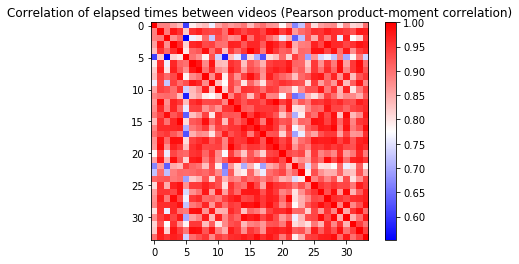

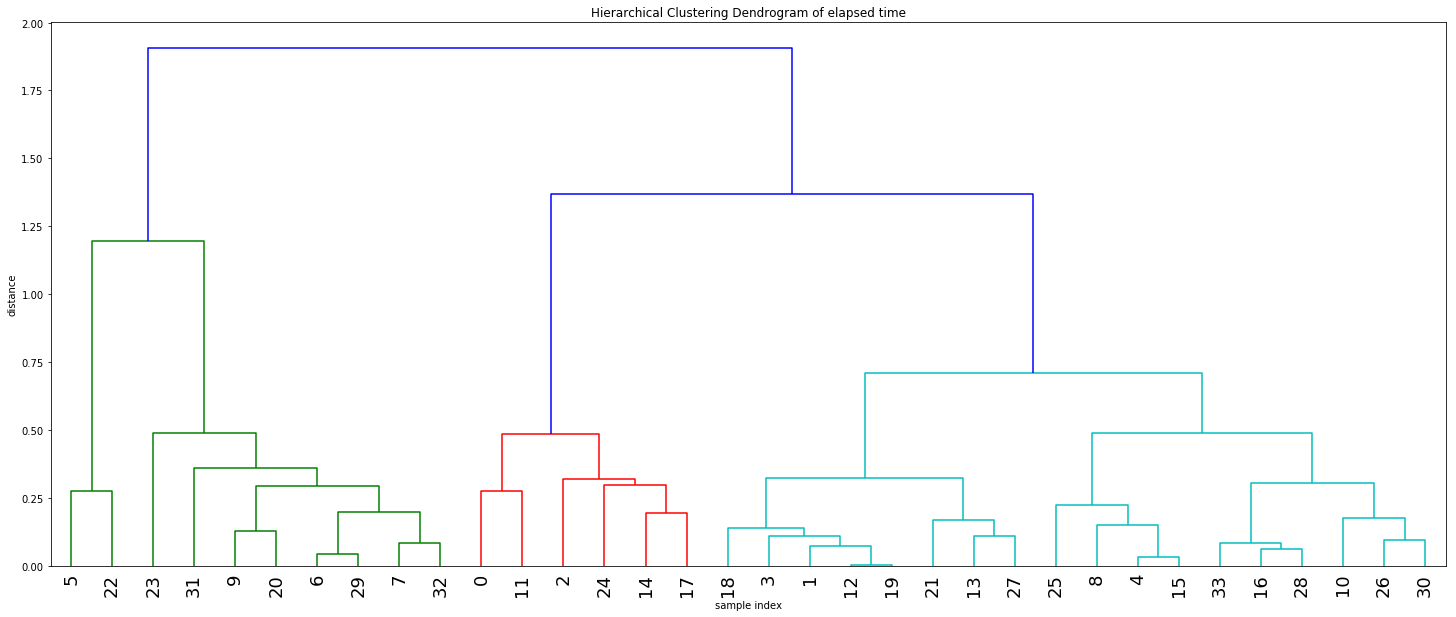

In [35]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

from numpy import *

taille = len(listeVideo)

corrElap= [[0 for x in range(taille)] for y in range(taille)]

for i in range(taille):
    for j in range(taille):
        corrElap[i][j] = np.corrcoef(listeVideo[i]['elapsedtime'],listeVideo[j]['elapsedtime'])[0,1]
        
plt.imshow(corrElap,cmap='bwr',interpolation='nearest')
plt.title('Correlation of elapsed times between videos (Pearson product-moment correlation)')
plt.colorbar()
plt.show()

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift


dendTime = linkage(corrElap, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram of elapsed time')
plt.xlabel('sample index')
plt.ylabel('distance')
d = dendrogram(    
    dendTime,    
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=18.,  # font size for the x axis labels
)
d
plt.show()

indicesTemps = d['leaves']

Test with the elap correlation

In [146]:
groupe1 = [5,22,23,31,9,20,6,29,7,32]
groupe2 = [0,11,2,24,14,17]
groupe3 = [18,3,1,12,19,21,13,27,25,8,4,15,33,16,28,10,26,30]

len(groupe1)+len(groupe2)+len(groupe3)

34

In [181]:
from random import *

def groupe(idTarget):
    #return the groupe where the video n° idTarget is
    
    if idTarget in groupe1:
        return groupe1
    if idTarget in groupe2:
        return groupe2
    if idTarget in groupe3:
        return groupe3

def video_ref(idTarget):
    #choose a random video in a group which is not the actual video and return it
    
    grp = groupe(idTarget)
    loc = idTarget
    while(loc == idTarget):
        idloc = randint(0,len(grp)-1)
        loc = grp[idloc]
    return loc
    
print(video_ref(18))
print(video_ref(18))
print(video_ref(18))

16
15
1


In [174]:
# Tracer évolution r2 des modèles selon taille échantillon avec learning simple à partir de random forest sur le temps
# Learning simple à partir de random forest sur la taille
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt



r2_groupe = []
for j in range(len(listeVideo)):
    
    aux = listeVideo[j]
    source = listeVideo[video_ref(j)]
    
    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,65):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_groupe.append(r2)

data_groupe = pandas.DataFrame(data=r2_groupe)



In [175]:
source = listeVideo[0]

r2_fixe = []
for j in range(len(listeVideo)):
    
    aux = listeVideo[j]
    
    x = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,65):
        pct_test = 1-16*i/len(y)
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct_test, random_state=42)
        clf = RandomForestRegressor()
        clf.fit(X_train, y_train)
        prediction = clf.predict(X_test)
        r2.append(r2_score(y_test, prediction))

    r2_fixe.append(r2)

data_fixe = pandas.DataFrame(data=r2_fixe)

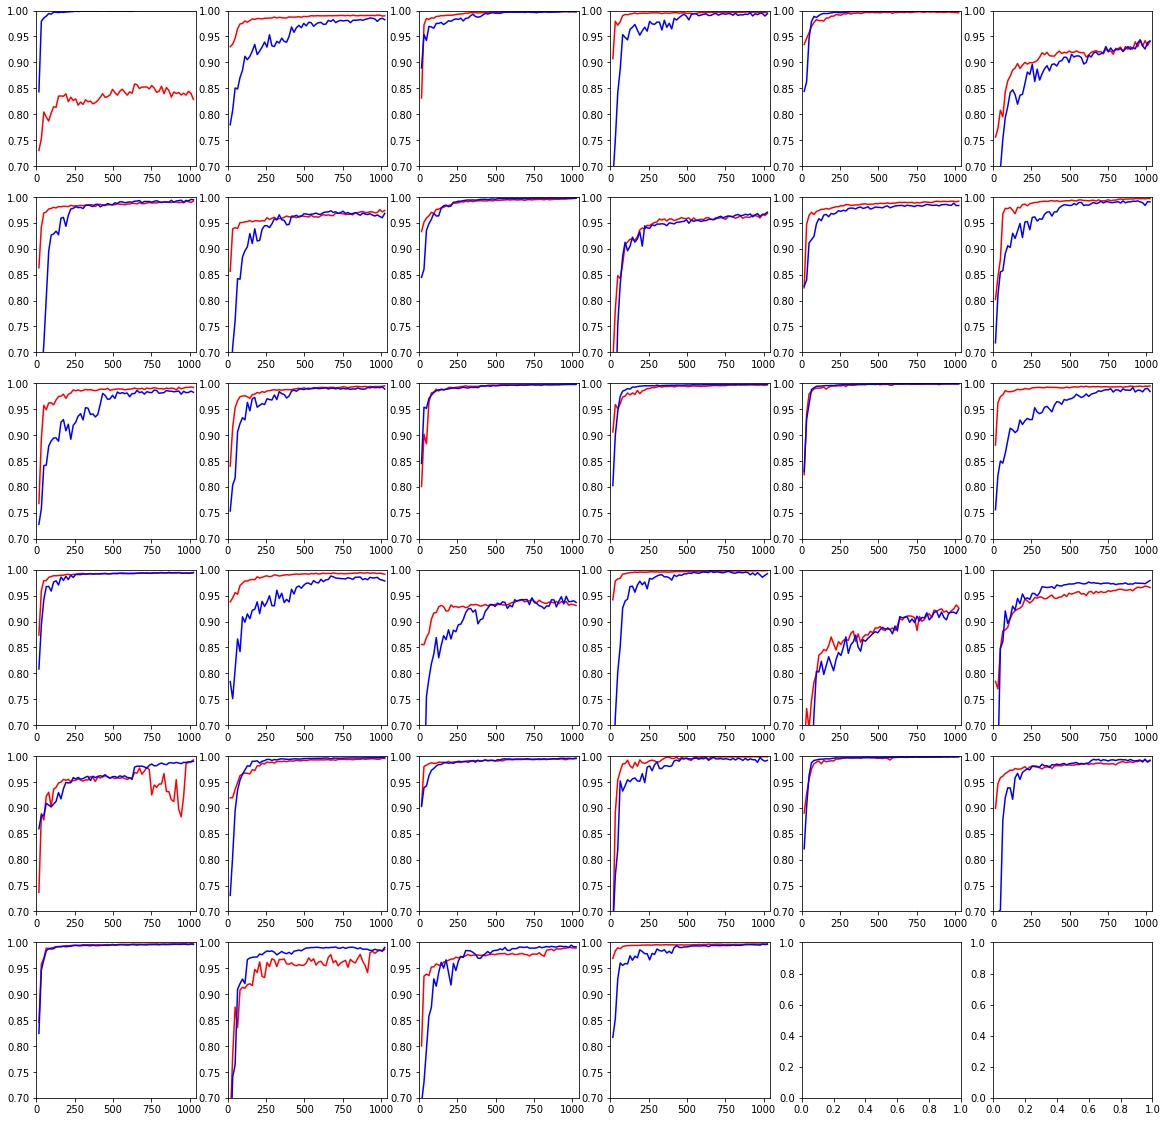

In [177]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_groupe[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_fixe[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,1040,0.7,1])
            plt.plot(range(16,1040,16),x1[0],c="red")
            plt.plot(range(16,1040,16),x2[0],c="blue")
plt.show()